<a href="https://colab.research.google.com/github/bala-baskar/deep_learning_path/blob/main/courses/IITM_CS7015_Deep%20learning/classical_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

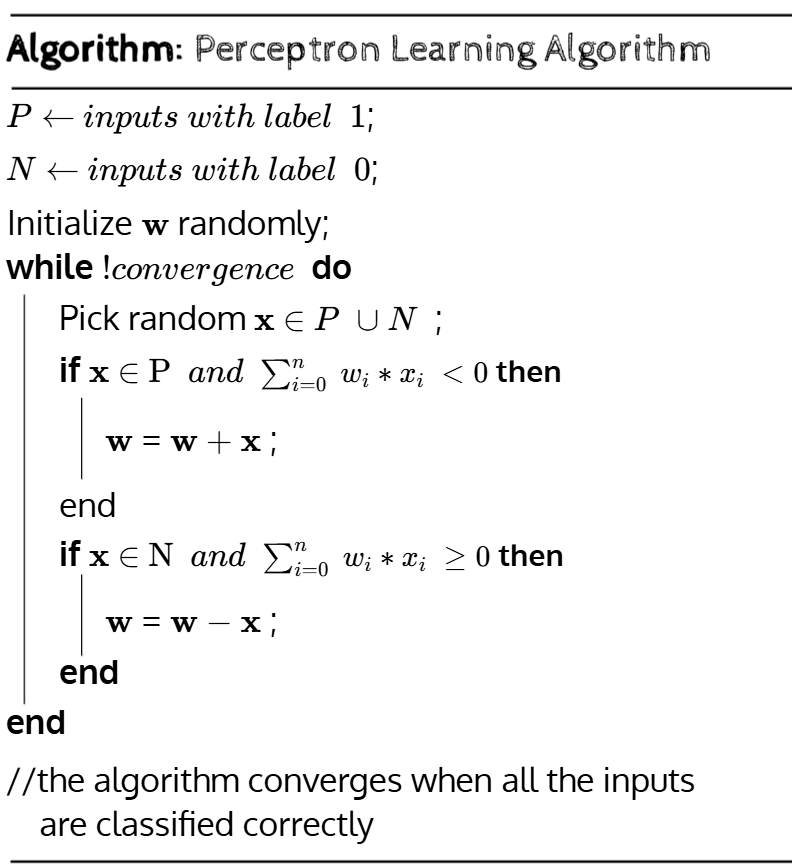


In [ ]:
data = pd.DataFrame({'x0':[1,1,1,1,1,1,1],
                     'x1':[2,10,8,2,-4,2,10],
                     'x2':[10,6,12,2,2,-2,3],
                     'target':[1,1,1,0,0,0,1]})
data

,x0,x1,x2,target
0,1,2,10,1
1,1,10,6,1
2,1,8,12,1
3,1,2,2,0
4,1,-4,2,0
5,1,2,-2,0
6,1,10,3,1


In [ ]:
w = np.random.rand(3,1)
print(w)

[[0.98037321]
 [0.18342391]
 [0.87210862]]


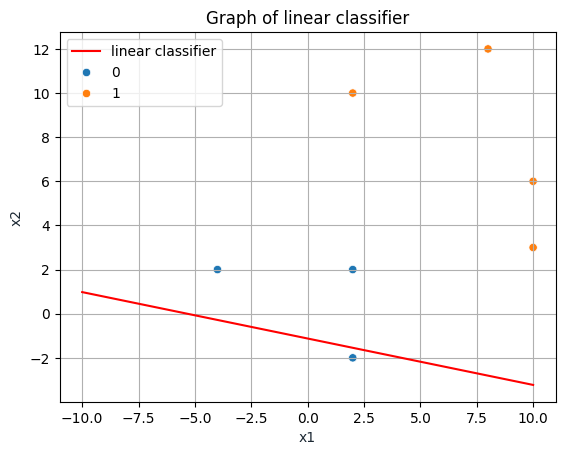

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.linspace(-10,10,20)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1
plt.plot(x1, x2, '-r', label='linear classifier')
sns.scatterplot(x=data['x1'],y=data['x2'],hue=data['target'])
plt.title('Graph of linear classifier')
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
iteration = 1500
flag_1,flag_2 = True,True
counter = 0
while flag_1 & flag_2:
  row = np.random.choice(range(len(data)))
  #print(row)
  if data.loc[row,'target'] == 1:
    if np.dot(w.T,data.loc[1,['x0','x1','x2']])[0] < 0:
      w = w + data.loc[row,['x0','x1','x2']].values.reshape(3,1)
  elif data.loc[row,'target'] == 0:
    if np.dot(w.T,data.loc[1,['x0','x1','x2']])[0] > 0:
      w = w - data.loc[row,['x0','x1','x2']].values.reshape(3,1)

  #print(w)
  data['wTx'] = np.dot(data[['x0','x1','x2']],w)
  data['pred'] = data['wTx'].apply(lambda x: 1 if x >= 0 else 0)
  flag_1 = True if np.sum(data['target'] == data['pred']) != len(data) else False
  if not flag_1:
    print("Convergence completed!")
  flag_2 = True if counter < iteration else False
  if not flag_2 :
    print('Not converged, stopping iteration!') if np.sum(data['target'] == data['pred']) != len(data) else print('Convergence completed!')
  counter+=1
  #trials.remove(row)

Convergence completed!


In [ ]:
data

,x0,x1,x2,target,wTx,pred
0,1,2,10,1,6.068307,1
1,1,10,6,1,68.047264,1
2,1,8,12,1,56.913068,1
3,1,2,2,0,-0.908562,0
4,1,-4,2,0,-50.009105,0
5,1,2,-2,0,-4.396996,0
6,1,10,3,1,65.430938,1


In [ ]:
w, counter

(array([[-19.01962679],
        [  8.18342391],
        [  0.87210862]]),
 41)

Equation of line: 8.183423910816302x1 + 0.872108616378835x2 - -19.01962679217255 = 0


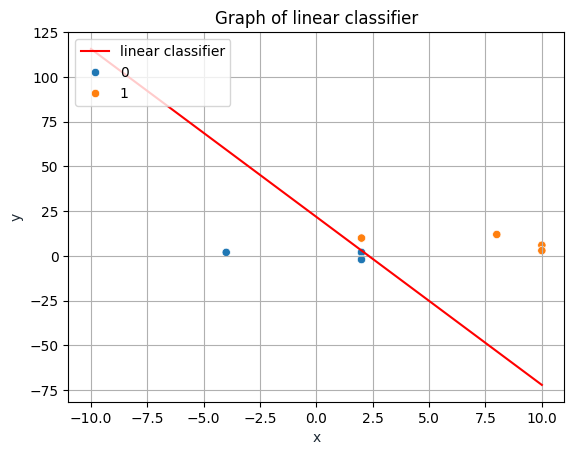

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.linspace(-10,10,20)
x2 = -(w[0][0]/w[2][0]) - (w[1][0]/w[2][0])*x1
print(f"Equation of line: {w[1][0]}x1 + {w[2][0]}x2 - {w[0][0]} = 0")
plt.plot(x1, x2, '-r', label='linear classifier')
sns.scatterplot(x=data['x1'],y=data['x2'],hue=data['target'])
plt.title('Graph of linear classifier')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()